In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset 1 - Video Games

In [81]:
game_df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
game_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [9]:
game_df.isna().sum().sort_values(ascending=False)

User_Count         9129
Critic_Count       8582
Critic_Score       8582
Rating             6769
User_Score         6704
Developer          6623
Year_of_Release     269
Publisher            54
Genre                 2
Name                  2
Global_Sales          0
Other_Sales           0
JP_Sales              0
EU_Sales              0
NA_Sales              0
Platform              0
dtype: int64

In [10]:
game_df.dropna(subset=['Year_of_Release'], inplace=True)
game_df.dropna(subset=['Publisher'], inplace=True)
game_df.dropna(subset=['Genre'], inplace=True)

Text(0.5, 0, 'Publisher Names')

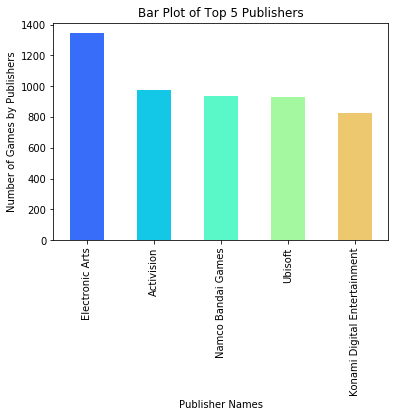

In [11]:
game_df.Publisher.value_counts().head(5).plot.bar(color=sns.color_palette("rainbow"))
plt.title('Bar Plot of Top 5 Publishers')
plt.ylabel('Number of Games by Publishers')
plt.xlabel('Publisher Names')

Text(0.5, 1.0, 'North American Sales vs Global Sales by Genre')

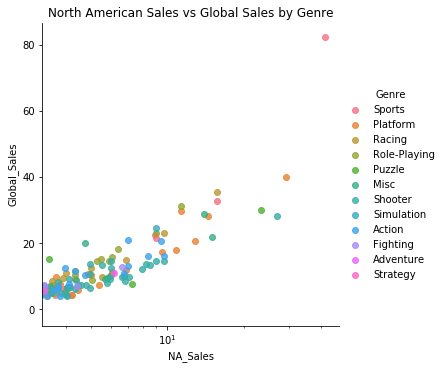

In [20]:
sns.lmplot(x='NA_Sales', y='Global_Sales', data=game_df,
           fit_reg=False, # No regression line
           hue='Genre')  # Color by evolution stage
plt.xscale('log')
plt.title('North American Sales vs Global Sales by Genre')

In [85]:
game_df.dropna(subset=['Year_of_Release'], inplace=True)
game_df['Year_of_Release'] = game_df['Year_of_Release'].astype('int64')

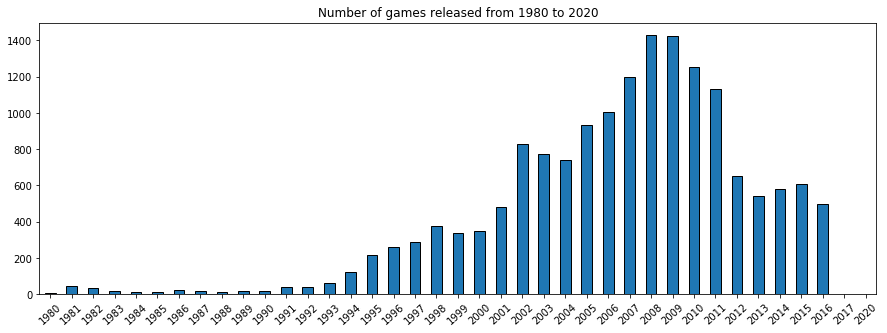

In [18]:
game_df.groupby('Year_of_Release')['Name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black'
)
plt.title('Number of games released from 1980 to 2020')
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

In [47]:
game_df = game_df.drop(game_df[game_df['User_Score']=='tbd'].index)

In [48]:
game_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16685,Worms 2,PC,1997,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01,NaN,NaN,8.1,12.0,Team 17,K-A
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
16706,STORM: Frontline Nation,PC,2011,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


In [50]:
game_df['User_Score'] = game_df['User_Score'].astype('float64')

In [55]:
correlation = ['Global_Sales', 'User_Score', 'Critic_Score']
game_df_clean = game_df[correlation]

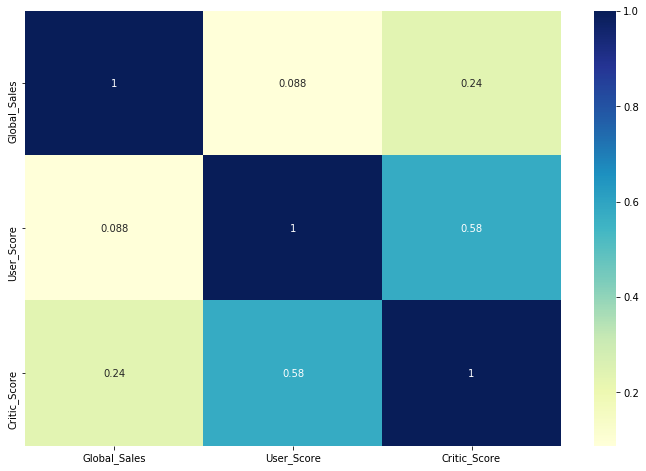

In [56]:
plt.figure(figsize=(12, 8))

vg_corr = game_df_clean.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True, cmap = 'YlGnBu');

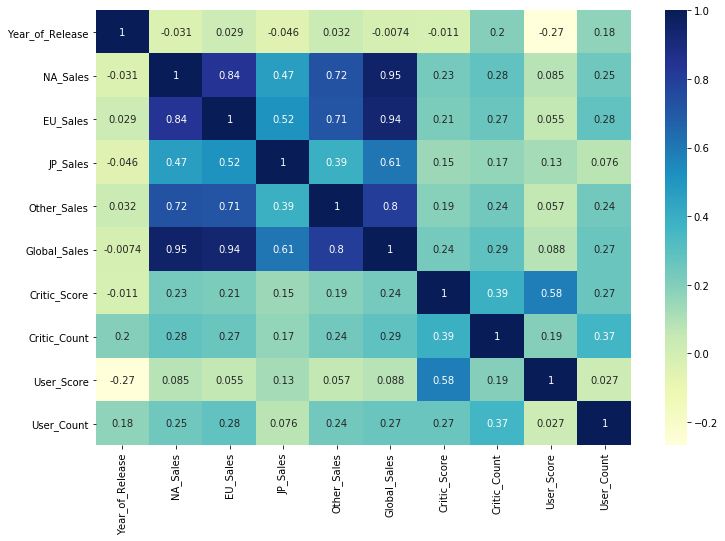

In [65]:
plt.figure(figsize=(12, 8))

vg_corr = game_df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True, cmap = 'YlGnBu');

In [63]:
def heatmap_plot(data):

    plt.figure(figsize=(15,5))
    plt.title('Heatmap Correlation and Impact Distribution of Critics and Users')
    sns.heatmap(data[['Global_Sales', 'User_Score', 'Critic_Score']].corr(), 
                annot=True, cmap='mako', fmt='.3f'
               )
    
    sns.jointplot(x='Critic_Score', y='Global_Sales', data=data, kind='scatter')
    sns.jointplot(x='User_Score', y='Global_Sales', data=data, kind='scatter')
    plt.show()

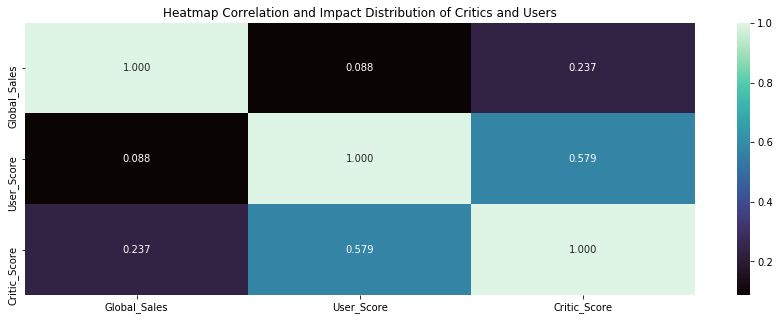

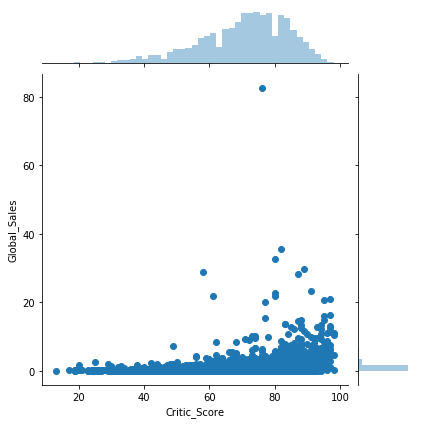

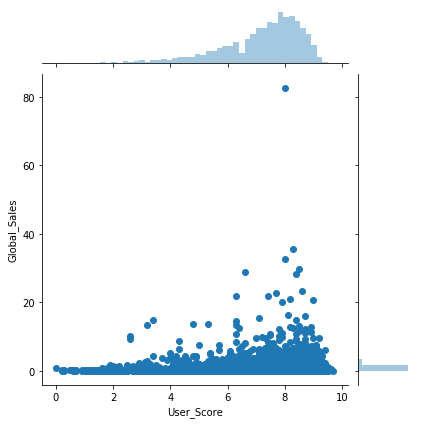

In [64]:
heatmap_plot(game_df)

In [86]:
games_12_16 = game_df.query('Year_of_Release >=2012').reset_index(drop=True)
games_12_16.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,NaN
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M


In [87]:
pd.crosstab(games_12_16['Platform'], 
            games_12_16['Year_of_Release'],
            margins=True, margins_name="total"
           ).sort_values(by='total', ascending=False)

Year_of_Release,2012,2013,2014,2015,2016,2017,2020,total
Platform,,,,,,,,
total,653,544,581,606,502,3,1,2890
PS3,148,126,108,73,38,0,0,493
PSV,53,63,100,110,85,2,0,413
3DS,93,91,80,86,46,0,0,396
PS4,0,16,75,137,164,1,0,393
X360,106,75,63,35,13,0,0,292
PC,61,38,47,50,54,0,0,250
XOne,0,19,61,80,87,0,0,247
PSP,106,54,10,3,0,0,0,173


In [ ]:
na_number = pd.concat((shoot_del_df.loc[:,'id':'arms_category'], 
                       shoot_del_df.isna().sum(axis=1), shoot_del_df['signs_of_mental_illness']), axis="columns")

na_number = na_number.rename(columns={0:'Nanumber'})

sns.heatmap(na_number.loc[:,('Nanumber', 'signs_of_mental_illness')].corr(), annot=True, vmin=1, vmax=1)
plt.show()

In [ ]:
na_number = pd.concat((df.loc))

In [ ]:
# Dataset 2 - US Police Shootings 

In [7]:
shoot_df = pd.read_csv('./shootings.csv')
shoot_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [8]:
shoot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
id                         4895 non-null int64
name                       4895 non-null object
date                       4895 non-null object
manner_of_death            4895 non-null object
armed                      4895 non-null object
age                        4895 non-null float64
gender                     4895 non-null object
race                       4895 non-null object
city                       4895 non-null object
state                      4895 non-null object
signs_of_mental_illness    4895 non-null bool
threat_level               4895 non-null object
flee                       4895 non-null object
body_camera                4895 non-null bool
arms_category              4895 non-null object
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 506.8+ KB


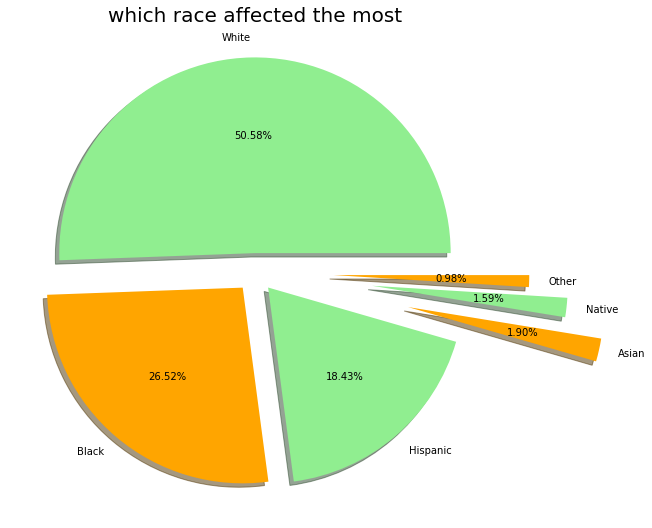

In [92]:
colors = ['lightgreen', 'orange']

size = shoot_df['race'].value_counts()
labels = shoot_df['race'].value_counts().index
explode = [0.1, 0.1, 0.1, 0.8, 0.6,0.4]

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, colors=colors, labels=labels, explode=explode, shadow= True, autopct= '%0.2f%%')
plt.title('which race affected the most',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

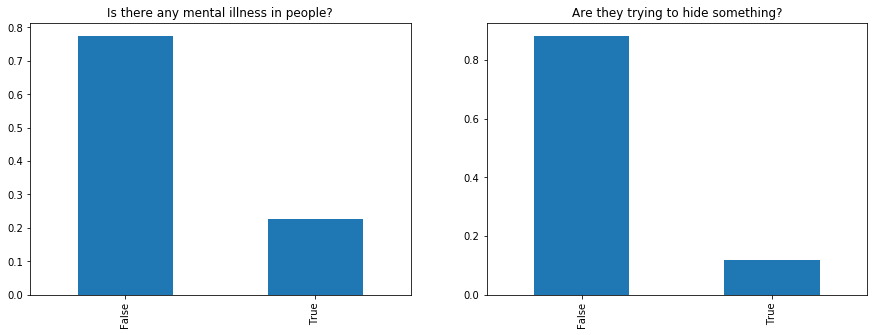

In [93]:
plt.rcParams['figure.figsize'] = (15,5)

plt.subplot(1,2,1)
plt.style.use('fast')
shoot_df['signs_of_mental_illness'].value_counts(normalize=True).plot.bar( )

plt.title('Is there any mental illness in people?')



plt.subplot(1,2,2)

plt.style.use('fast')

shoot_df['body_camera'].value_counts(normalize=True).plot.bar()
plt.title('Are they trying to hide something?')

plt.show()

In [131]:
shoot_del_df = pd.read_csv('./shootings_del.csv')
shoot_del_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,threat_level,flee,body_camera,arms_category,signs_of_mental_illness
0,3,Tim Elliot,2015/1/2,shot,gun,53.0,M,Asian,NaN,WA,attack,NaN,False,NaN,True
1,4,Lewis Lee Lembke,2015/1/2,shot,gun,47.0,M,White,Aloha,OR,attack,Not fleeing,False,Guns,False
2,5,John Paul Quintero,2015/1/3,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,other,Not fleeing,False,Unarmed,False
3,8,Matthew Hoffman,2015/1/4,shot,toy weapon,32.0,M,NaN,San Francisco,NaN,NaN,Not fleeing,False,Other unusual objects,True
4,9,Michael Rodriguez,2015/1/4,shot,nail gun,39.0,M,Hispanic,Evans,CO,attack,Not fleeing,False,Piercing objects,False


In [132]:
shoot_del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
id                         4895 non-null int64
name                       4895 non-null object
date                       4895 non-null object
manner_of_death            4879 non-null object
armed                      4875 non-null object
age                        4858 non-null float64
gender                     4867 non-null object
race                       4853 non-null object
city                       4869 non-null object
state                      4869 non-null object
threat_level               4879 non-null object
flee                       4875 non-null object
body_camera                4877 non-null object
arms_category              4882 non-null object
signs_of_mental_illness    4895 non-null bool
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 540.3+ KB


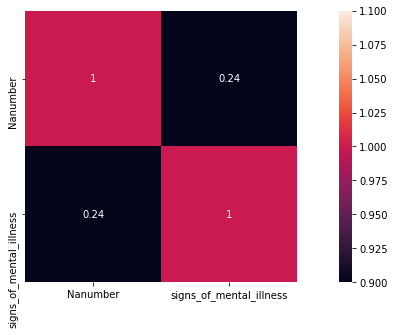

In [135]:
na_number = pd.concat((shoot_del_df.loc[:,'id':'arms_category'], 
                       shoot_del_df.isna().sum(axis=1), shoot_del_df['signs_of_mental_illness']), axis="columns")

na_number = na_number.rename(columns={0:'Nanumber'})

sns.heatmap(na_number.loc[:,('Nanumber', 'signs_of_mental_illness')].corr(), annot=True, vmin=1, vmax=1, square=True)
plt.show()